In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels.stats import weightstats as ws
from pandas import isnull

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
sns.set()

### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

In [4]:
df = pd.read_csv('stud_math.csv')

In [108]:
df1 = pd.read_csv('stud_math.csv')

In [109]:
df1.columns = ['school', 'sex', 'age', 'addr_type', 'famsize', 'p_status', 'm_edu', 'f_edu',
               'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
               'failures', 'schoolsup', 'famsup', 'paid_math', 'activities', 'nursery',
               'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
               'freetime', 'go_out', 'health', 'absences', 'score']

In [111]:
for col in colstodigit_list_small:
    df1[col+'_dig'] = df1[col].apply(lambda x: simple_dic_small[x]
                                     if isnull(x) is False else x)

In [5]:
df.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
15,GP,F,16,U,GT3,NaN,4.0,4.0,health,other,home,mother,1.0,1.0,0.0,no,yes,no,no,yes,-3.0,yes,yes,no,4.0,4.0,4.0,2.0,4.0,70.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
359,MS,F,18,NaN,LE3,T,1.0,1.0,at_home,services,course,father,2.0,3.0,0.0,no,no,no,no,NaN,-9.0,yes,yes,no,5.0,3.0,2.0,4.0,0.0,80.0
347,GP,M,18,U,GT3,T,4.0,3.0,teacher,other,course,NaN,1.0,3.0,0.0,no,yes,yes,no,yes,-9.0,NaN,yes,yes,NaN,4.0,5.0,5.0,0.0,45.0


In [6]:
df.columns = ['school', 'sex', 'age', 'addr_type', 'famsize', 'p_status', 'm_edu', 'f_edu',
              'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid_math', 'activities', 'nursery',
              'studytime_gran', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'go_out', 'health', 'absences', 'score']
# school — аббревиатура школы, в которой учится ученик
# sex — пол ученика ('F' - женский, 'M' - мужской)
# age — возраст ученика (от 15 до 22)
# address — тип адреса ученика ('U' - городской, 'R' - за городом)
# famsize — размер семьи('LE3' <= 3, 'GT3' >3)
# Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
# Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
# Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
# reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
# guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
# traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
# studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
# failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
# schoolsup — дополнительная образовательная поддержка (yes или no)
# famsup — семейная образовательная поддержка (yes или no)
# paid — дополнительные платные занятия по математике (yes или no)
# activities — дополнительные внеучебные занятия (yes или no)
# nursery — посещал детский сад (yes или no)
# higher — хочет получить высшее образование (yes или no)
# internet — наличие интернета дома (yes или no)
# romantic — в романтических отношениях (yes или no)
# famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
# freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
# goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
# health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
# absences — количество пропущенных занятий
# score — баллы по госэкзамену по математике

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school            395 non-null object
sex               395 non-null object
age               395 non-null int64
addr_type         378 non-null object
famsize           368 non-null object
p_status          350 non-null object
m_edu             392 non-null float64
f_edu             371 non-null float64
m_job             376 non-null object
f_job             359 non-null object
reason            378 non-null object
guardian          364 non-null object
traveltime        367 non-null float64
studytime         388 non-null float64
failures          373 non-null float64
schoolsup         386 non-null object
famsup            356 non-null object
paid_math         355 non-null object
activities        381 non-null object
nursery           379 non-null object
studytime_gran    388 non-null float64
higher            375 non-null object
internet          361 non-null object
romantic        

In [7]:
columns = ['school', 'sex', 'age', 'addr_type', 'famsize', 'p_status', 'm_edu', 'f_edu',
           'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
           'failures', 'schoolsup', 'famsup', 'paid_math', 'activities', 'nursery',
           'studytime', 'higher', 'internet', 'romantic', 'famrel',
           'freetime', 'go_out', 'health', 'absences', 'score']

In [9]:
# списки колонок по типам
int_cols = []
float_cols = []
obj_cols = []
for col in df.columns:
    if df[col].dtype == 'O':
        obj_cols.append(col)
    elif df[col].dtype == 'int64':
        int_cols.append(col)
    else:
        float_cols.append(col)

In [10]:
dig_cols = int_cols+float_cols

## Общие показатели

In [ ]:
def general_func_by_coltype(frame):
    for col in frame.columns:
        if df.loc[:, col].dtype == 'O':
            print('ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ {}'.format(col))
            print('Пустых значений: {}'. format(
                len(df)-df[:, col].value_counts().sum()))
            print('Уникальных значений {}, из них с частотой более 10: {} \n\n'.format(
                df[:, col].nunique(), (df[:, col].value_counts() > 10).sum()))
        elif df.loc[:, col].dtype == 'int64' or df.loc[:, col].dtype == 'float64':
            print('ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ {}'.format(col))
            print('Пустых значений: {}'.format(
                len(df)-df[:, col].value_counts().sum()))
            median = df.loc[:, col].median()
            IQR = df.loc[:, col].quantile(0.75) - df.loc[:, col].quantile(0.25)
            perc25 = df.loc[:, col].quantile(0.25)
            perc75 = df.loc[:, col].quantile(0.75)
            df = df.loc[df.loc[:, col].between(
                perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [ ]:
general_func_by_coltype(df)

### Обрабатываем колонки  с текстовыми значениями

#### проверка на наличие посторонних символов в строках

In [11]:
def syminstr(column):
    print('Обработка колонки {}'.format(column))
    if type(df[column][0]) == str:
        for index, item in df[column].loc[df[column].isna() != True].items():
            if item.isalpha():
                continue
            else:
                print('Встречается символ помимо букв в колонке {c} в строке {i}, значение {w}'.format(
                    c=column, i=index, w=item))

In [ ]:
for col in columns:
    syminstr(col)

#### Помимо букв в текстовых колонках только один посторонний символ - "_". Уберем его для простоты работы.

In [12]:
def sym_del(item):
    if type(item) == float:
        return None
    else:
        return item.replace('_', '')

In [13]:
df.m_job = df.m_job.apply(sym_del)

In [14]:
df.f_job = df.f_job.apply(sym_del)

#### Выводим общие статистические данные по текстовым колонкам:

In [15]:
# функция для вывода статистических данных по текстовым колонкам
def strcolstat(col):
    print('ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ {}'.format(col))
    print('Пустых значений: {}'. format(len(df)-df[col].value_counts().sum()))
    print('Уникальных значений {}, из них с частотой более 20: {} \n\n'.format(
        df[col].nunique(), (df[col].value_counts() > 10).sum()))

In [16]:
# фкнуция для вывода статистических данных по числовым колонкам
def numcolstat(col):
    print('ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ {}'.format(col))
    print('Пустых значений: {} \n\n'.format(
        len(df)-df[col].value_counts().sum()))
    display(pd.DataFrame(df[col].value_counts()))

In [17]:
def colstatprint(col):
    if df[col].dtype == 'O':
        strcolstat(col)
    else:
        numcolstat(col)

In [18]:
for col in obj_cols:
    colstatprint(col)

ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ school
Пустых значений: 0
Уникальных значений 2, из них с частотой более 20: 2 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ sex
Пустых значений: 0
Уникальных значений 2, из них с частотой более 20: 2 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ addr_type
Пустых значений: 17
Уникальных значений 2, из них с частотой более 20: 2 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ famsize
Пустых значений: 27
Уникальных значений 2, из них с частотой более 20: 2 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ p_status
Пустых значений: 45
Уникальных значений 2, из них с частотой более 20: 2 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ m_job
Пустых значений: 19
Уникальных значений 5, из них с частотой более 20: 5 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ f_job
Пустых значений: 36
Уникальных значений 5, из них с частотой более 20: 5 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ reason
Пустых значений: 17
Уникальных значений 4, из них с частотой более 20: 4 


ОБРАБОТКА ТЕКСТОВОЙ КОЛОНКИ guardian
Пустых значений: 31
Уникальных значений 3, из них с частотой более 20: 3 




#### Заменяем nan на None для удобства

In [19]:
for col in columns:
    df[col] = df[col].apply(lambda x: None if isnull(x) else x)

### Обрабатываем дополнительно столбцы, в которых возможно только два значения: добавляем аналгичные столбцы с числами 0/1
##### идея была посмотреть корреляцию на замененных на числа текстовых значениях

In [20]:
def colstrtodigit(col):
    if df[col].nunique() < 3:
        colstodigit_list.append(col)

In [21]:
colstodigit_list = []
for col in columns:
    if df[col].dtype == 'O':
        colstrtodigit(col)
    else:
        continue

In [29]:
colstodigit_list

['school',
 'sex',
 'addr_type',
 'famsize',
 'p_status',
 'schoolsup',
 'famsup',
 'paid_math',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [22]:
dic_coltodigit = {}
for col in colstodigit_list:
    num = 0
    dic_colstodigit = {}
    for key in df[col].loc[df[col].isna() != True].unique():
        dic_colstodigit[key] = num
        num += 1
    dic_coltodigit[col] = dic_colstodigit

In [23]:
# замена Да - на 1, Нет - на 0
for value in dic_coltodigit.values():
    for key in value.keys():
        if key == 'yes' or key == 'GT3':
            value[key] = 1
        elif key == 'no' or key == 'LE3':
            value[key] = 0
        else:
            continue

In [30]:
dic_coltodigit

{'school': {'GP': 0, 'MS': 1},
 'sex': {'F': 0, 'M': 1},
 'addr_type': {'U': 0, 'R': 1},
 'famsize': {'GT3': 1, 'LE3': 0},
 'p_status': {'A': 0, 'T': 1},
 'schoolsup': {'yes': 1, 'no': 0},
 'famsup': {'no': 0, 'yes': 1},
 'paid_math': {'no': 0, 'yes': 1},
 'activities': {'no': 0, 'yes': 1},
 'nursery': {'yes': 1, 'no': 0},
 'higher': {'yes': 1, 'no': 0},
 'internet': {'yes': 1, 'no': 0},
 'romantic': {'no': 0, 'yes': 1}}

In [24]:
simple_dic = {}
for col in colstodigit_list:
    for key, value in dic_coltodigit[col].items():
        simple_dic[key] = value

In [25]:
simple_dic

{'GP': 0,
 'MS': 1,
 'F': 0,
 'M': 1,
 'U': 0,
 'R': 1,
 'GT3': 1,
 'LE3': 0,
 'A': 0,
 'T': 1,
 'yes': 1,
 'no': 0}

In [26]:
simple_dic_small = {}

In [31]:
colstodigit_list_small = []

In [32]:
colstodigit_list_small = ['famsize', 'schoolsup', 'famsup', 'paid_math',
                          'activities', 'nursery', 'higher', 'internet', 'romantic']

In [27]:
simple_dic_small = {'GT3': 1,
                    'LE3': 0,
                    'yes': 1,
                    'no': 0}

In [33]:
for col in colstodigit_list_small:
    df[col+'_dig'] = df[col].apply(lambda x: simple_dic_small[x]
                                   if isnull(x) is False else x)

In [34]:
df.sample(5)

,school,sex,age,addr_type,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid_math,activities,nursery,studytime_gran,higher,internet,romantic,famrel,freetime,go_out,health,absences,score,famsize_dig,schoolsup_dig,famsup_dig,paid_math_dig,activities_dig,nursery_dig,higher_dig,internet_dig,romantic_dig
182,GP,F,17,U,GT3,None,2.0,4.0,services,None,reputation,father,NaN,2.0,0.0,no,yes,no,yes,yes,-6.0,yes,no,no,5.0,4.0,2.0,5.0,0.0,85.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
343,GP,F,17,U,GT3,A,2.0,2.0,athome,athome,home,father,1.0,2.0,1.0,no,yes,no,no,yes,-6.0,yes,yes,yes,3.0,3.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
125,GP,M,15,U,GT3,T,3.0,4.0,services,services,home,father,1.0,1.0,NaN,yes,no,no,no,yes,-3.0,yes,None,no,5.0,5.0,5.0,5.0,0.0,60.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,athome,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
301,GP,M,17,U,LE3,T,4.0,4.0,other,teacher,home,father,2.0,1.0,0.0,no,no,yes,no,yes,-3.0,yes,yes,no,4.0,1.0,1.0,5.0,0.0,50.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0


### Исследуем числовые столбцы

##### Общее:

In [35]:
for col in dig_cols:
    colstatprint(col)

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ age
Пустых значений: 0 




,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ m_edu
Пустых значений: 3 




,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ f_edu
Пустых значений: 24 




,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ traveltime
Пустых значений: 28 




,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ studytime
Пустых значений: 7 




,studytime
2.0,194
1.0,103
3.0,64
4.0,27


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ failures
Пустых значений: 22 




,failures
0.0,293
1.0,49
2.0,16
3.0,15


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ studytime_gran
Пустых значений: 7 




,studytime_gran
-6.0,194
-3.0,103
-9.0,64
-12.0,27


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ famrel
Пустых значений: 27 




,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ freetime
Пустых значений: 11 




,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ go_out
Пустых значений: 8 




,go_out
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ health
Пустых значений: 15 




,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ absences
Пустых значений: 12 




,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ score
Пустых значений: 6 




,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


#### Вывод: все колонки типа float по факту можно преобразовать к int. Так проще строить визуализацию

### Исследуем распределение

In [ ]:
dig_cols

In [36]:
def float_to_int(val):
    if isnull(val):
        return None
    else:
        return int(val)

In [37]:
for col in dig_cols:
    df[col] = df[col].apply(float_to_int)

In [ ]:
def del_out_by_quant(col):
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    df = df.loc[df[col].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
          "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [38]:
def parameters(col):
    median = df[col].median()
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    perc25 = df[col].quantile(0.25)
    perc75 = df[col].quantile(0.75)
    return median, IQR, perc25, perc75

### Колонка age

#### Лимиты: 15:22

In [39]:
def digit_col_plot(col):
    df[col].hist(bins=df[col].nunique(), range=(
        df[col].min(), df[col].max()), label=col)
    plt.legend()

In [40]:
def digit_boxplot(col):
    sns.boxplot(x=col,  data=df)

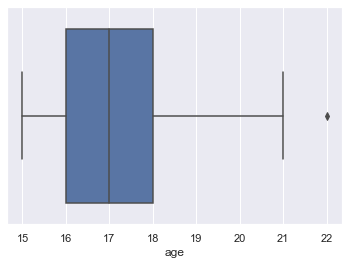

In [41]:
digit_boxplot('age')

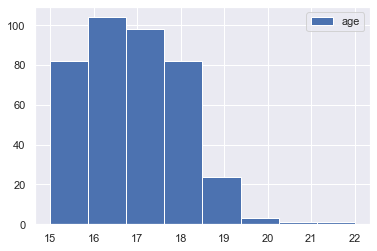

In [42]:
digit_col_plot('age')

In [43]:
df['age'].describe()

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

In [44]:
colstatprint('age')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ age
Пустых значений: 0 




,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [45]:
median, IQR, perc25, perc75 = parameters('age')
df = df.loc[df['age'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


In [ ]:
df['age'].describe()

##### Выводы: пропусков нет, распределение, смещенное вправо. Выбросов мало. Выборка смещена к более молодому возрасту, основное распределение лежит от 15 до 19

### Колонка m_edu
#### лимиты: 0:4

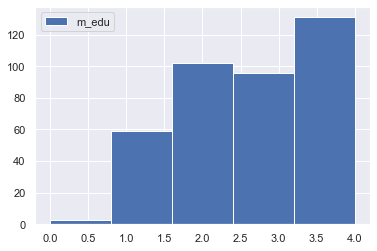

In [46]:
digit_col_plot('m_edu')

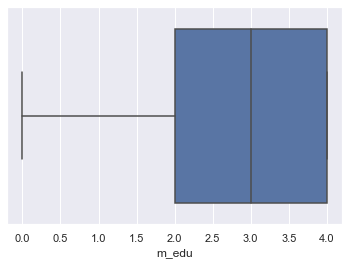

In [47]:
digit_boxplot('m_edu')

In [48]:
colstatprint('m_edu')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ m_edu
Пустых значений: 3 




,m_edu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [49]:
df['m_edu'].describe()

count    391.000000
mean       2.749361
std        1.099461
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: m_edu, dtype: float64

In [50]:
median, IQR, perc25, perc75 = parameters('m_edu')
df = df.loc[df['m_edu'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [ ]:
df['m_edu'].describe()

#### Выводы: пропусков мало, распределение, заметно смещенное влево. Выбросов мало. В выбрку попали в основном эксперименты, в которых у матери есть хотя бы 9 классов общего образования, основное распределение лежит от 2 до 4

### Анализируем f_edu
#### Лимиты: 0:4

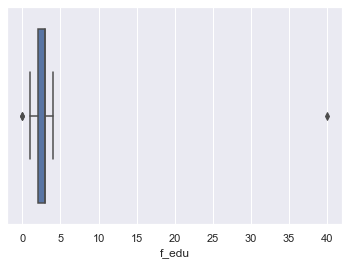

In [51]:
digit_boxplot('f_edu')

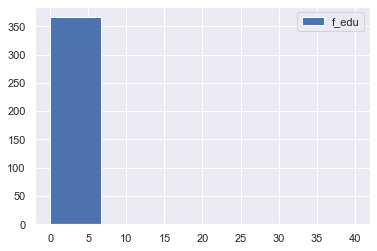

In [52]:
digit_col_plot('f_edu')

In [53]:
colstatprint('f_edu')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ f_edu
Пустых значений: 24 




,f_edu
2.0,105
3.0,95
4.0,88
1.0,76
0.0,2
40.0,1


In [54]:
df['f_edu'].describe()

count    367.000000
mean       2.623978
std        2.237356
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: f_edu, dtype: float64

In [ ]:
# del_out_by_quant(df, 'f_edu') - не работает

In [55]:
median, IQR, perc25, perc75 = parameters('f_edu')
df = df.loc[df['f_edu'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


In [ ]:
df['f_edu'].describe()

##### Вывод: в выборку попали семьи, у которых обраование матери в среднем выше, чем обьразование отца. Образование отцов в основном распределено между 2 и 3 (т.е. просто средняя или полная школа школа/техникум). Есть один выброс

### Колонка traveltime

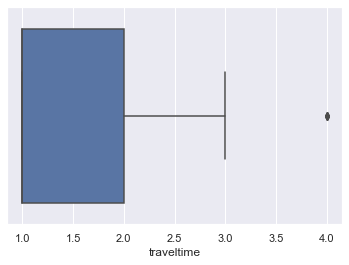

In [56]:
digit_boxplot('traveltime')

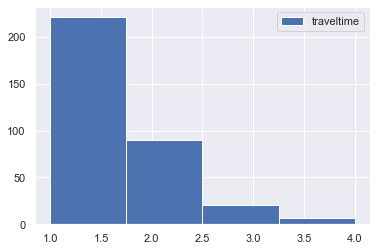

In [57]:
digit_col_plot('traveltime')

In [58]:
colstatprint('traveltime')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ traveltime
Пустых значений: 25 




,traveltime
1.0,221
2.0,90
3.0,21
4.0,7


In [59]:
df['traveltime'].describe()

count    339.000000
mean       1.451327
std        0.704900
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

In [60]:
median, IQR, perc25, perc75 = parameters('traveltime')
df = df.loc[df['traveltime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [ ]:
df['traveltime'].describe()

##### Выводы: Распределение также смещено вправо. В целом у учеников школа расположена в основном близко (в 30 минутах от дома)

#### studytime

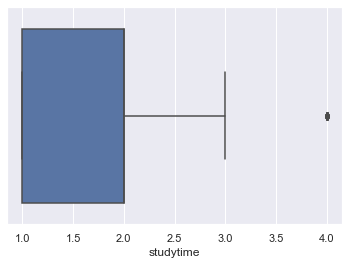

In [61]:
digit_boxplot('studytime')

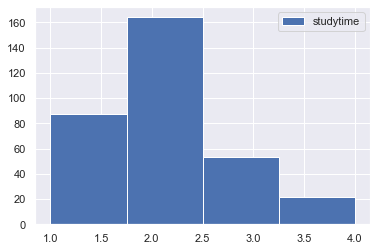

In [62]:
digit_col_plot('studytime')

In [63]:
colstatprint('studytime')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ studytime
Пустых значений: 6 




,studytime
2.0,164
1.0,87
3.0,53
4.0,22


In [64]:
df['studytime'].describe()

count    326.000000
mean       2.030675
std        0.837015
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

In [65]:
median, IQR, perc25, perc75 = parameters('studytime')
df = df.loc[df['studytime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


In [ ]:
df['studytime'].describe()

##### Выводы: в ццелом распределение нормальное, ученики в осноном тратят от 1 до 2 часов для занятий дополнительно

### failures

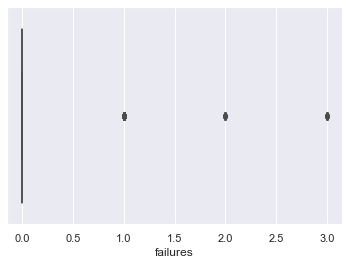

In [66]:
digit_boxplot('failures')

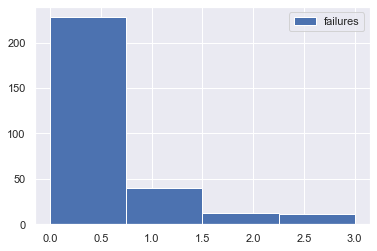

In [67]:
digit_col_plot('failures')

In [68]:
colstatprint('failures')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ failures
Пустых значений: 13 




,failures
0.0,228
1.0,40
2.0,12
3.0,11


In [69]:
df['failures'].describe()

count    291.000000
mean       0.333333
std        0.730297
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

In [70]:
median, IQR, perc25, perc75 = parameters('failures')
df = df.loc[df['failures'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


In [ ]:
df['failures'].describe()

##### Выводы: Внешкольные неудачи очень редки, до такой степени, что даже единичные случаи являются выбросами. Скорее всего, эо связано с низким возрастом учеников

### studytime_gran

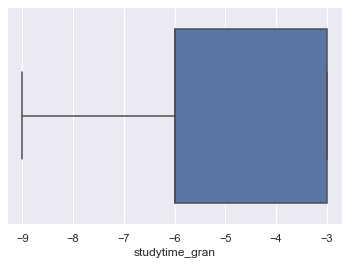

In [71]:
digit_boxplot('studytime_gran')

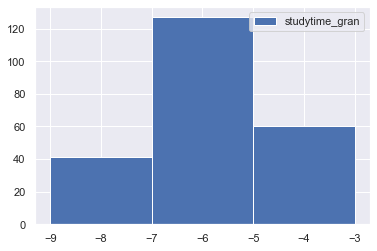

In [72]:
digit_col_plot('studytime_gran')

In [73]:
colstatprint('studytime_gran')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ studytime_gran
Пустых значений: 0 




,studytime_gran
-6.0,127
-3.0,60
-9.0,41


In [74]:
df['studytime_gran'].describe()

count    228.000000
mean      -5.750000
std        1.985354
min       -9.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime_gran, dtype: float64

In [75]:
median, IQR, perc25, perc75 = parameters('studytime_gran')
df = df.loc[df['studytime_gran'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


In [ ]:
df['studytime_gran'].describe()

##### Выводы: сложно сделать, т.к. колонка непонятная. В целом распределение нормалоьное без выбросов. Пустых значений нет

### famrel

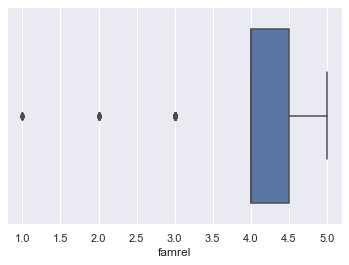

In [76]:
digit_boxplot('famrel')

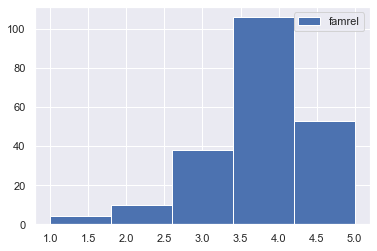

In [77]:
digit_col_plot('famrel')

In [78]:
colstatprint('famrel')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ famrel
Пустых значений: 17 




,famrel
4.0,106
5.0,53
3.0,38
2.0,10
1.0,4


In [79]:
df['famrel'].describe()

count    211.000000
mean       3.919431
std        0.888097
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64

In [80]:
median, IQR, perc25, perc75 = parameters('famrel')
df = df.loc[df['famrel'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 4.0, 75-й перцентиль: 4.5, IQR: 0.5,  Границы выбросов: [3.25, 5.25].


In [ ]:
df['famrel'].describe()

##### Выводы: распределение было смещено влево. В целом почти у всех детей отношения в семье хорошие или очень хорошие

### freetime

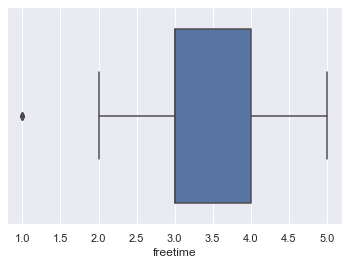

In [81]:
digit_boxplot('freetime')

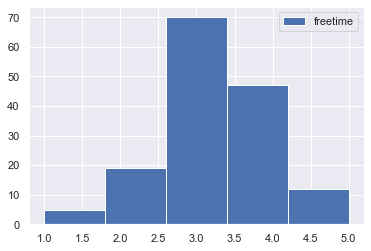

In [82]:
digit_col_plot('freetime')

In [83]:
colstatprint('freetime')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ freetime
Пустых значений: 6 




,freetime
3.0,70
4.0,47
2.0,19
5.0,12
1.0,5


In [84]:
df['freetime'].describe()

count    153.000000
mean       3.274510
std        0.897623
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

In [85]:
median, IQR, perc25, perc75 = parameters('freetime')
df = df.loc[df['freetime'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


In [ ]:
df['freetime'].describe()

##### Выводы: в целом распределение нормальное, свободного вреимени у учеников в основном от 3 до 4 часов

### go_out

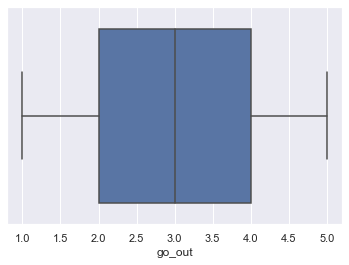

In [86]:
digit_boxplot('go_out')

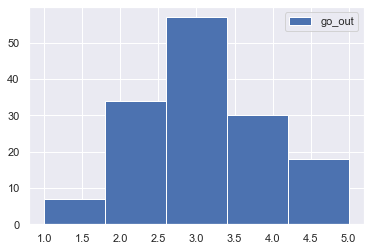

In [87]:
digit_col_plot('go_out')

In [88]:
colstatprint('go_out')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ go_out
Пустых значений: 2 




,go_out
3.0,57
2.0,34
4.0,30
5.0,18
1.0,7


In [89]:
df['go_out'].describe()

count    146.000000
mean       3.123288
std        1.056281
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: go_out, dtype: float64

In [90]:
median, IQR, perc25, perc75 = parameters('go_out')
df = df.loc[df['go_out'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


In [ ]:
df['go_out'].describe()

##### Выводы: распределение нормальное, в основном все ученики гуляют с друзьями от 2 до 4 часов, н очень много пропуков данных (около трети)

### health

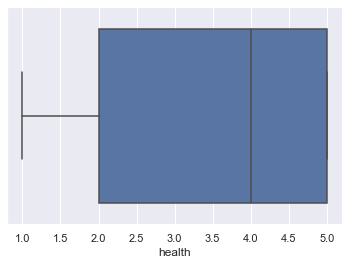

In [91]:
digit_boxplot('health')

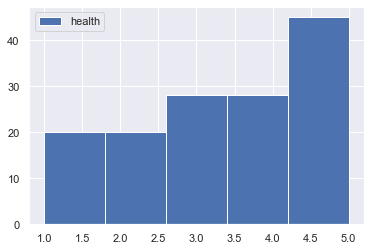

In [92]:
digit_col_plot('health')

In [93]:
colstatprint('health')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ health
Пустых значений: 5 




,health
5.0,45
4.0,28
3.0,28
1.0,20
2.0,20


In [94]:
df['health'].describe()

count    141.000000
mean       3.411348
std        1.424635
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

In [95]:
median, IQR, perc25, perc75 = parameters('health')
df = df.loc[df['health'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 2.0, 75-й перцентиль: 5.0, IQR: 3.0,  Границы выбросов: [-2.5, 9.5].


In [ ]:
df['health'].describe()

##### Выводы: в целом распределение смешено влево

### absences

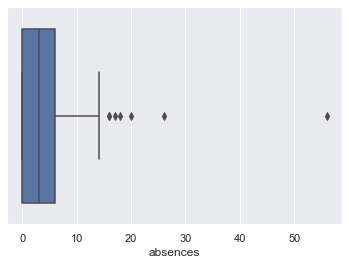

In [96]:
digit_boxplot('absences')

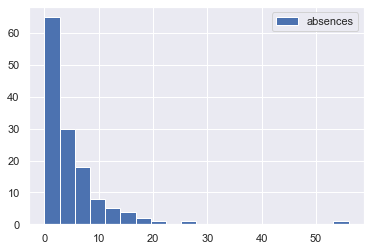

In [97]:
digit_col_plot('absences')

In [98]:
colstatprint('absences')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ absences
Пустых значений: 6 




,absences
0.0,43
4.0,26
2.0,21
6.0,8
8.0,7
10.0,6
12.0,4
7.0,3
3.0,3
14.0,2


In [99]:
df['absences'].describe()

count    135.000000
mean       4.607407
std        6.582537
min        0.000000
25%        0.000000
50%        3.000000
75%        6.000000
max       56.000000
Name: absences, dtype: float64

In [100]:
median, IQR, perc25, perc75 = parameters('absences')
df = df.loc[df['absences'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 6.0, IQR: 6.0,  Границы выбросов: [-9.0, 15.0].


In [ ]:
df['absences'].describe()

##### Выводы: в целом цченики пропускают не так много уровков (в основном от 2 до 6), распределение сильно смещено вправо

### score

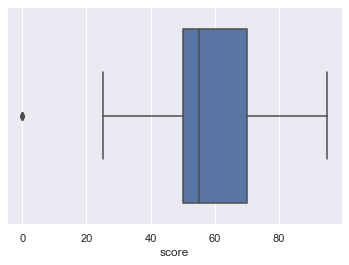

In [101]:
digit_boxplot('score')

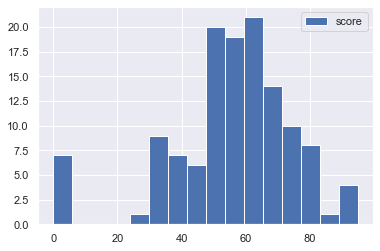

In [102]:
digit_col_plot('score')

In [103]:
colstatprint('score')

ОБРАБОТКА ЧИСЛОВОЙ КОЛОНКИ score
Пустых значений: 1 




,score
50.0,20
55.0,19
70.0,14
65.0,12
75.0,10
60.0,9
80.0,8
0.0,7
40.0,7
30.0,7


In [104]:
df['score'].describe()

count    127.000000
mean      55.433071
std       19.850869
min        0.000000
25%       50.000000
50%       55.000000
75%       70.000000
max       95.000000
Name: score, dtype: float64

In [105]:
median, IQR, perc25, perc75 = parameters('score')
df = df.loc[df['score'].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 50.0, 75-й перцентиль: 70.0, IQR: 20.0,  Границы выбросов: [20.0, 100.0].


In [ ]:
df['score'].describe()

##### Выводы: ошибка в данных - нулевой балл за экзамен (выброс). Скорее всего, графа оценок была 100-балльная

### Корреляционный анализ

In [106]:
df.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,studytime_gran,famrel,freetime,go_out,health,absences,score,famsize_dig,schoolsup_dig,famsup_dig,paid_math_dig,activities_dig,nursery_dig,higher_dig,internet_dig,romantic_dig
age,1.000000,-0.043281,-0.100141,0.189335,0.007304,NaN,-0.007304,-8.452114e-02,-8.047077e-02,0.111146,-0.034241,0.210241,-0.123756,0.017608,-0.253059,-0.112686,-0.011574,-0.135686,-0.040035,-0.068088,-0.096643,0.093901
m_edu,-0.043281,1.000000,0.620653,-0.055629,0.060845,NaN,-0.060845,6.202532e-02,6.510970e-02,0.008407,-0.058203,0.123055,0.126962,-0.082144,0.003146,0.279708,0.062943,0.144868,0.183964,0.265521,0.093897,0.091130
f_edu,-0.100141,0.620653,1.000000,-0.042178,-0.046599,NaN,0.046599,3.483533e-02,4.113856e-02,-0.043158,0.041265,0.065537,0.077740,0.015952,0.160953,0.193534,0.012430,0.098773,0.141736,0.078652,0.140727,0.087848
traveltime,0.189335,-0.055629,-0.042178,1.000000,-0.143967,NaN,0.143967,-1.076244e-01,7.343461e-02,-0.063820,-0.005000,-0.044366,-0.021659,-0.113165,-0.096825,0.052025,0.097719,0.013102,-0.004794,-0.066692,0.094225,0.037606
studytime,0.007304,0.060845,-0.046599,-0.143967,1.000000,NaN,-1.000000,2.972629e-02,-3.120451e-02,0.013850,-0.061220,-0.033633,0.005128,-0.019619,0.014904,0.093882,0.129362,0.017338,0.015751,0.160702,0.105894,0.117940
failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studytime_gran,-0.007304,-0.060845,0.046599,0.143967,-1.000000,NaN,1.000000,-2.972629e-02,3.120451e-02,-0.013850,0.061220,0.033633,-0.005128,0.019619,-0.014904,-0.093882,-0.129362,-0.017338,-0.015751,-0.160702,-0.105894,-0.117940
famrel,-0.084521,0.062025,0.034835,-0.107624,0.029726,NaN,-0.029726,1.000000e+00,-9.323455e-17,-0.076241,-0.015485,-0.041515,0.235743,-0.067008,0.018946,-0.114423,-0.224917,0.135851,-0.093875,0.017774,0.078734,-0.129662
freetime,-0.080471,0.065110,0.041139,0.073435,-0.031205,NaN,0.031205,-9.323455e-17,1.000000e+00,0.096706,0.065831,-0.022097,0.029424,-0.115952,-0.039181,0.101381,0.023188,0.070373,-0.053690,0.066535,0.041656,-0.162547
go_out,0.111146,0.008407,-0.043158,-0.063820,0.013850,NaN,-0.013850,-7.624108e-02,9.670579e-02,1.000000,-0.063750,0.224904,-0.271061,-0.005501,-0.009753,0.021197,0.119671,-0.057550,-0.038698,-0.097707,0.166591,0.032176


In [ ]:
df.drop(['failures', 'studytime_gran', 'famrel'], inplace=True, axis=1)

In [114]:
df1.drop(['studytime_gran'], inplace=True, axis=1)

In [115]:
# изначальный датасет
df1.corr()

,age,m_edu,f_edu,traveltime,studytime,failures,famrel,freetime,go_out,health,absences,score,famsize_dig,schoolsup_dig,famsup_dig,paid_math_dig,activities_dig,nursery_dig,higher_dig,internet_dig,romantic_dig
age,1.000000,-0.161704,-0.138018,0.081508,-0.015556,0.228047,0.068899,0.029023,0.135107,-0.065946,0.093592,-0.155726,-0.022638,-0.256343,-0.159311,-0.030502,-0.110231,-0.106453,-0.207837,-0.108964,0.144440
m_edu,-0.161704,1.000000,0.275598,-0.173515,0.078589,-0.245463,-0.010050,0.025335,0.064164,-0.045051,-0.011944,0.213349,0.055857,-0.042360,0.207429,0.178744,0.106883,0.188484,0.176596,0.208719,0.023870
f_edu,-0.138018,0.275598,1.000000,0.030646,0.057199,-0.150821,0.040577,-0.066556,-0.023282,0.027251,0.004695,0.078573,0.070146,0.007020,0.140006,0.007128,0.098939,0.101002,0.100104,0.083520,-0.027778
traveltime,0.081508,-0.173515,0.030646,1.000000,-0.102206,0.064699,-0.016857,-0.021937,0.037636,-0.021531,-0.048215,-0.070559,-0.041872,-0.009752,-0.020651,-0.044878,-0.002043,-0.046749,-0.082866,-0.086334,0.022876
studytime,-0.015556,0.078589,0.057199,-0.102206,1.000000,-0.178992,0.045894,-0.121969,-0.051280,-0.080016,-0.026544,0.115741,0.086096,0.031873,0.129236,0.201447,0.110905,0.083487,0.174532,0.063471,0.055469
failures,0.228047,-0.245463,-0.150821,0.064699,-0.178992,1.000000,-0.022655,0.098382,0.120914,0.081284,0.057391,-0.344338,-0.002320,0.006310,-0.093340,-0.178898,-0.091205,-0.111398,-0.282585,-0.065367,0.095931
famrel,0.068899,-0.010050,0.040577,-0.016857,0.045894,-0.022655,1.000000,0.175743,0.081154,0.077474,-0.082609,0.057112,0.017231,-0.004088,-0.011997,-0.017581,0.063347,-0.016333,0.011767,0.052213,-0.066593
freetime,0.029023,0.025335,-0.066556,-0.021937,-0.121969,0.098382,0.175743,1.000000,0.296437,0.061575,0.009292,0.019026,-0.026207,-0.056599,-0.004149,-0.065099,0.074122,-0.041744,-0.050828,0.093749,-0.036552
go_out,0.135107,0.064164,-0.023282,0.037636,-0.051280,0.120914,0.081154,0.296437,1.000000,-0.015608,-0.048738,-0.129685,-0.028745,-0.037061,-0.040759,0.032648,0.045012,-0.006419,-0.022376,0.107363,0.009982
health,-0.065946,-0.045051,0.027251,-0.021531,-0.080016,0.081284,0.077474,0.061575,-0.015608,1.000000,-0.016222,-0.070460,0.048005,-0.030906,0.030130,-0.080834,0.027280,-0.020761,0.007746,-0.089305,0.010607


#### Выводы из анализа корреляции: 
Взросление обратно коррелирует с баллом на экзамене, предположительно потому, что ученик:
•	пропускает больше занятий
•	больше гуляет с друзьями
•	Появляется интерес к романтически отношениям
•	Имеет меньше свободного времени
•	Имеет меньшую дополнительную поддержу в школе (потому что прогуливает) и дома
•	Балл на экзамене ниже
Интересно, что время на учебу вне школы с возрастом почти не меняется (уменьшается незначительно), как и количество свободного времени (почти не увеличиваетя).

Уровень образования матери в большей степени коррелирует с высоким баллом, чем уровень образования отца, также заметно большее влияние уровня образования матери на дополнительные источники знаний для ребенка: домашние дополнительные занятия, платные курсы, интернет. В силу этого можно предположить, что с ребенком больше занимаются.

Также в большой степени на уровень балла экзамена влияет желание поступить в ВУЗ. 
Дети, которые посещали детский сад также в среднем получают более высокие баллы на экзамене, предположительно потому, что они более устойчивы к неудачам (видна обратная корреляция).

### Анализ номинативных признаков

##### поведем три анализа двух наборов: исходного с обогащением (df1) и очищенного (df)

In [152]:
def get_boxplot1(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df1.loc[df1.loc[:, column].isin(
                    df1.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

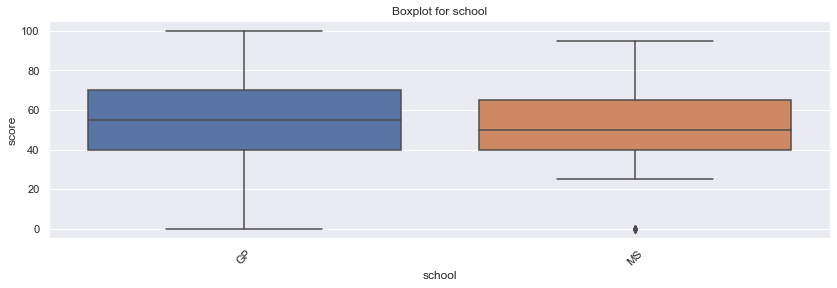

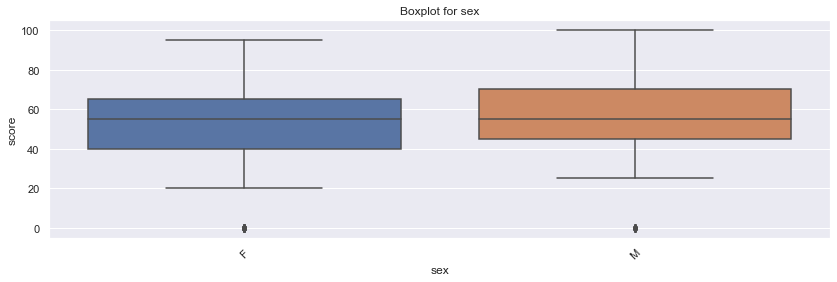

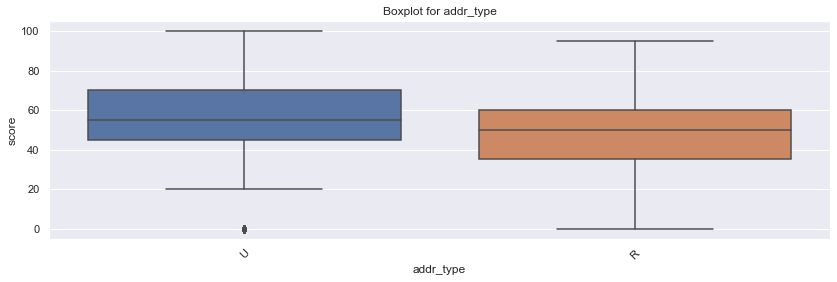

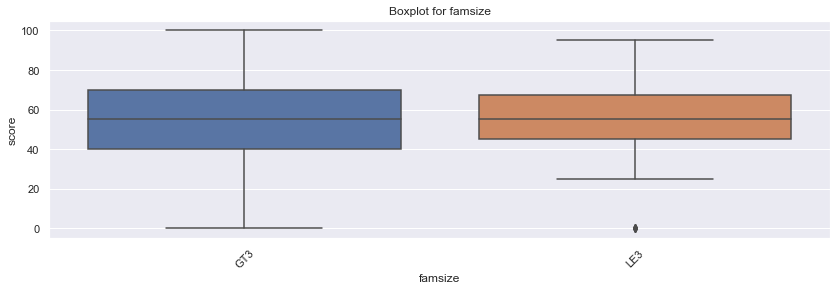

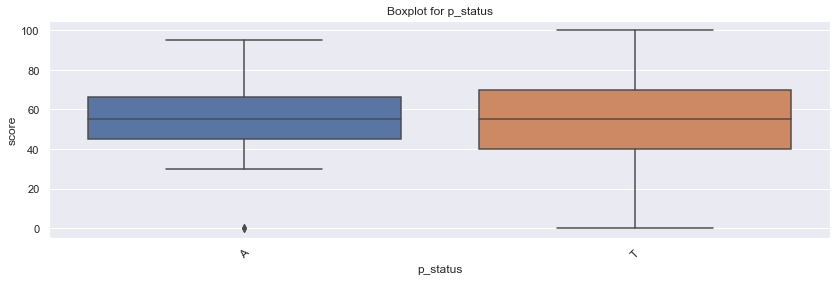

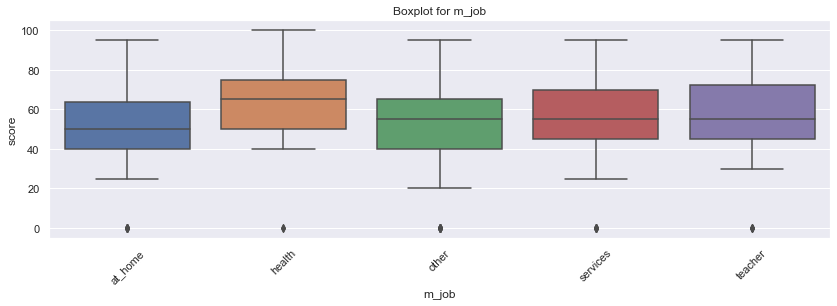

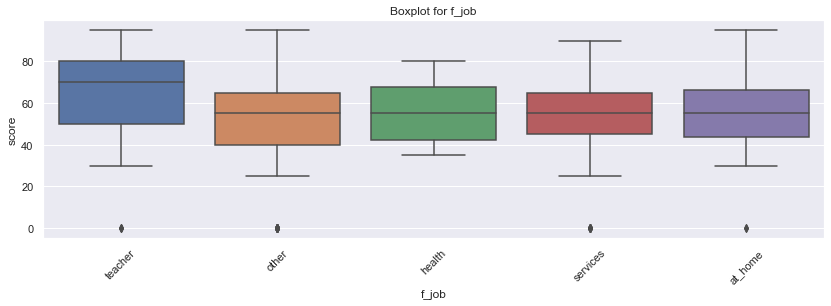

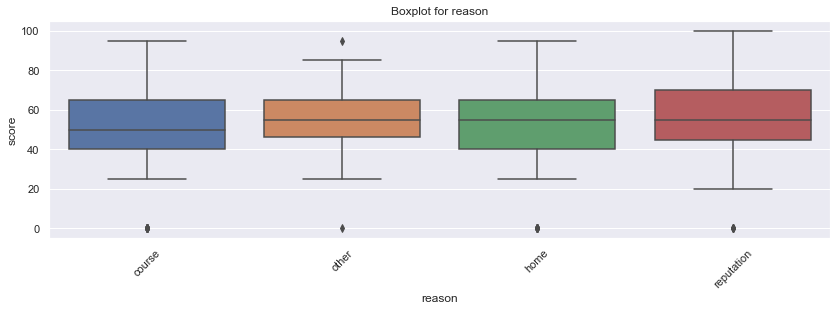

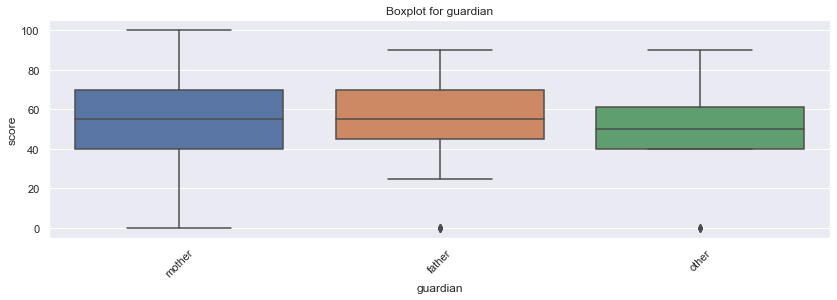

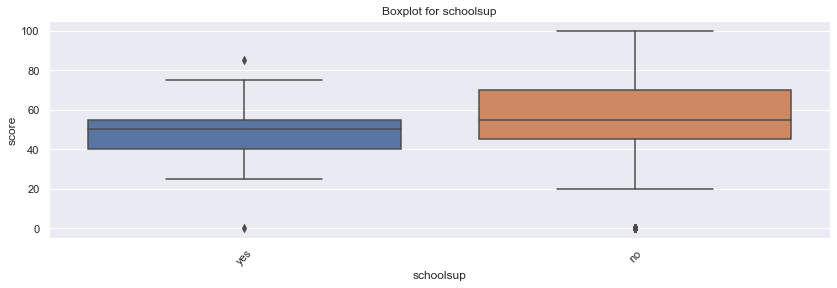

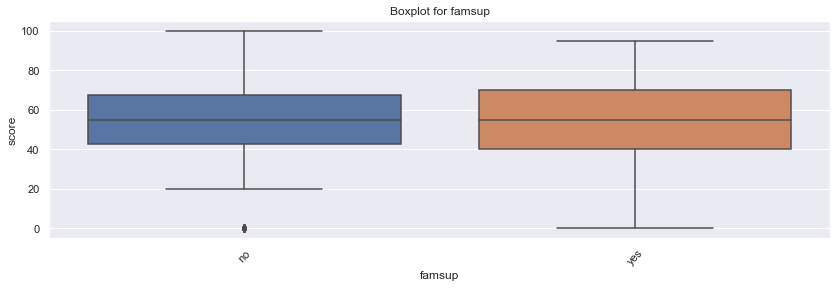

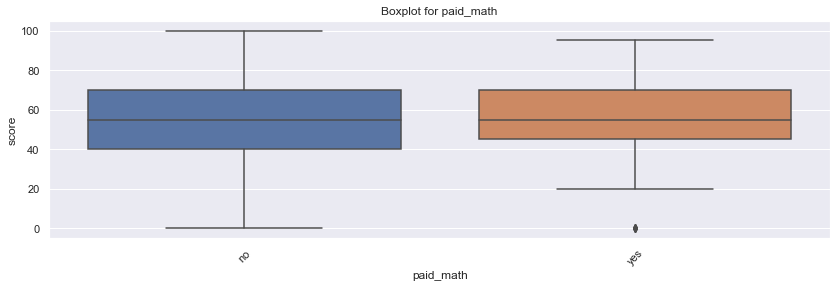

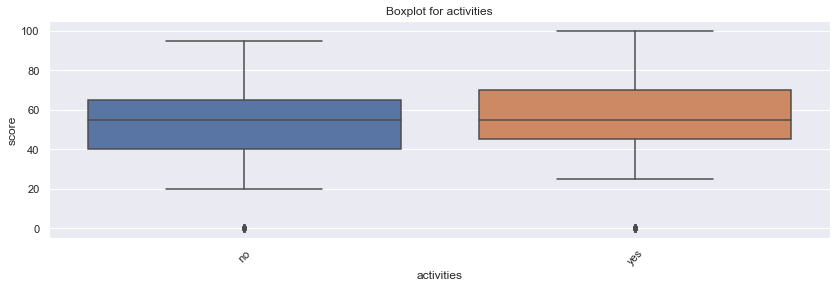

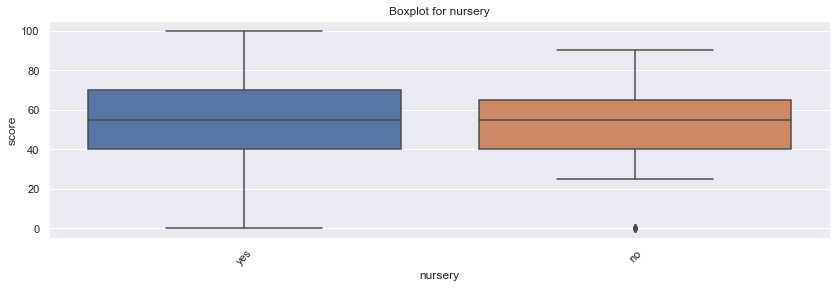

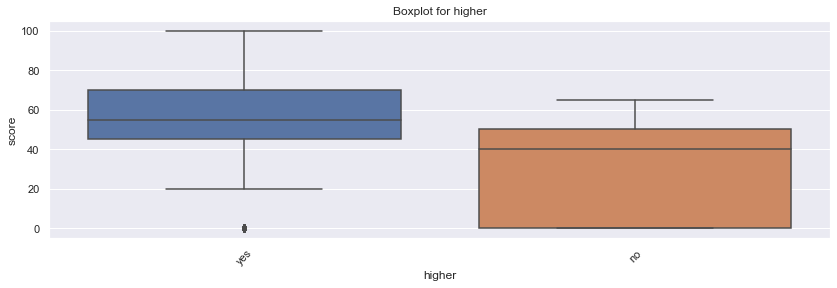

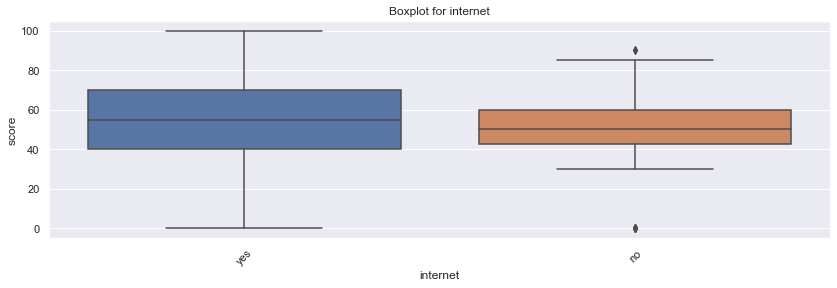

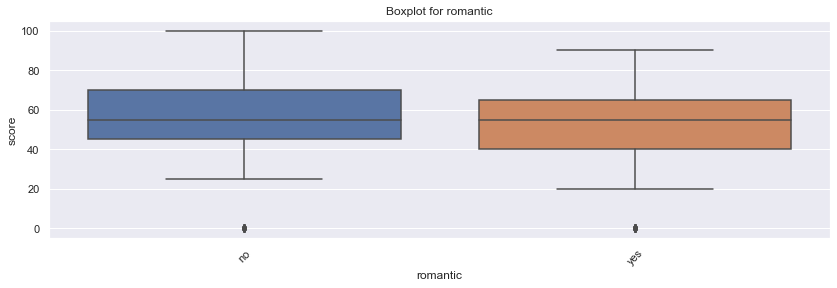

In [153]:
for col in obj_cols:
    get_boxplot1(col)

##### Для срвнения с обогащенным исходным строим то, что получилось после очитки

In [155]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

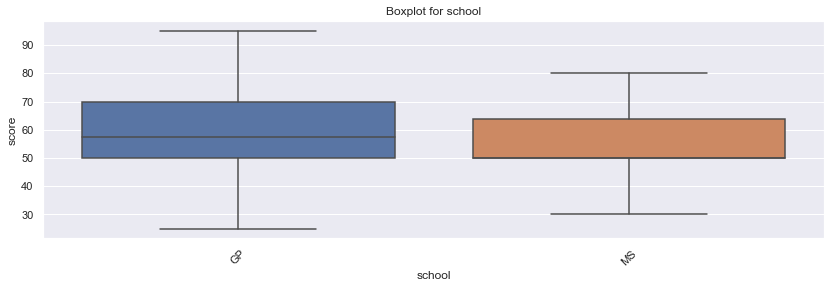

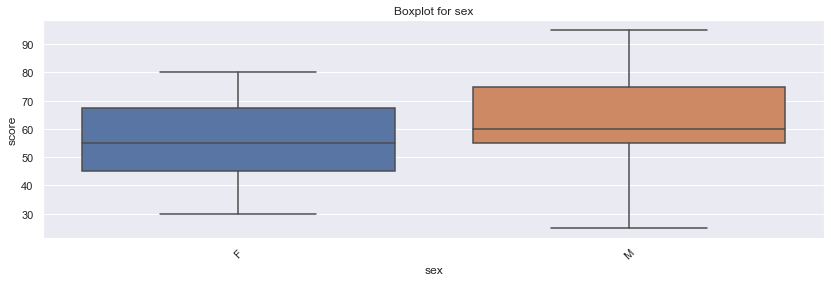

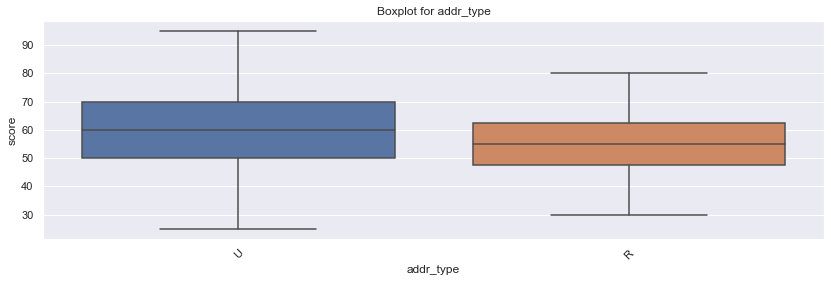

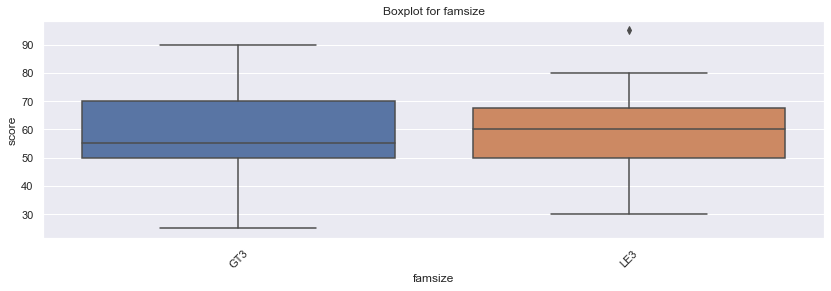

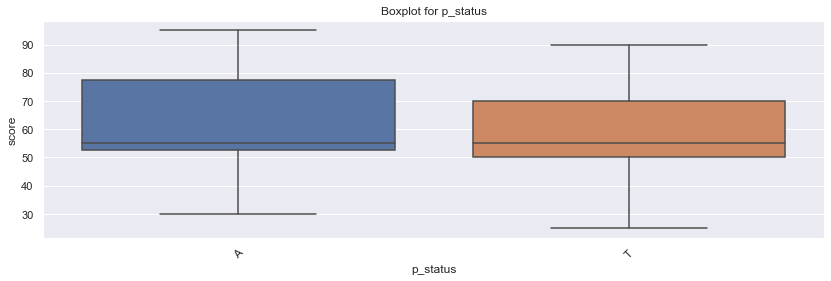

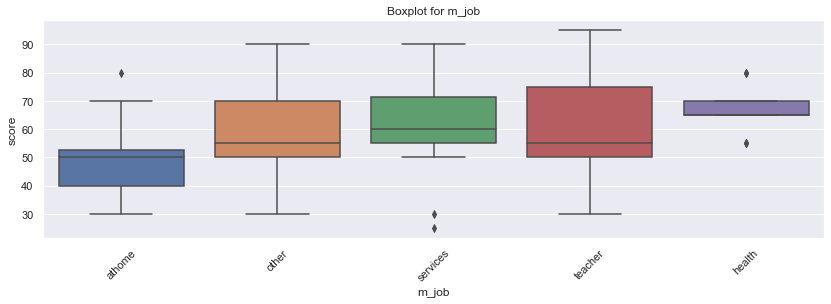

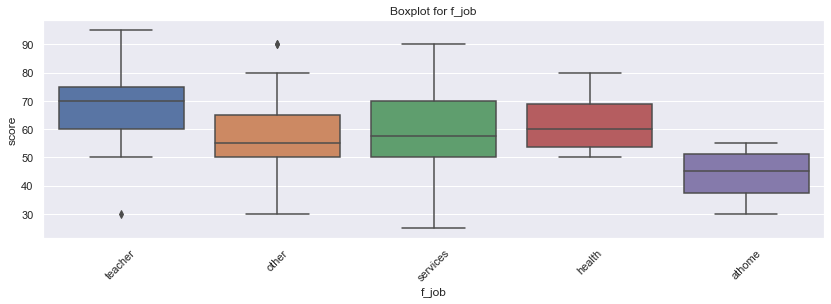

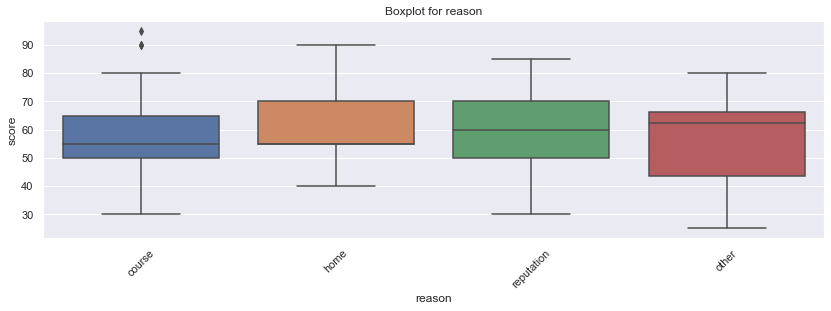

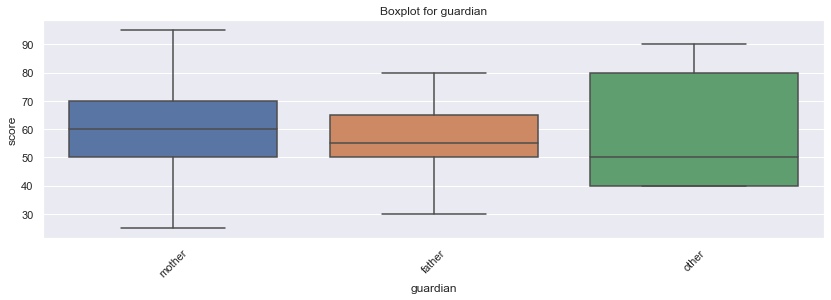

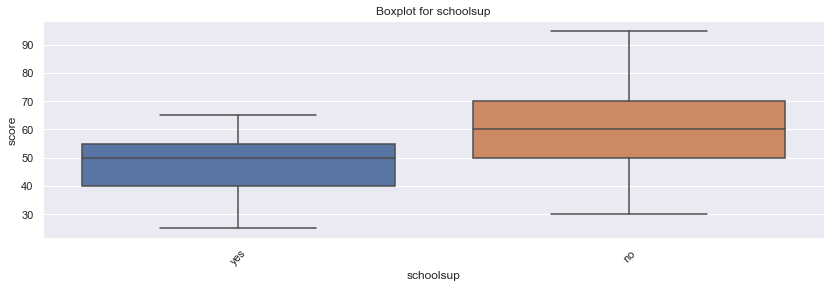

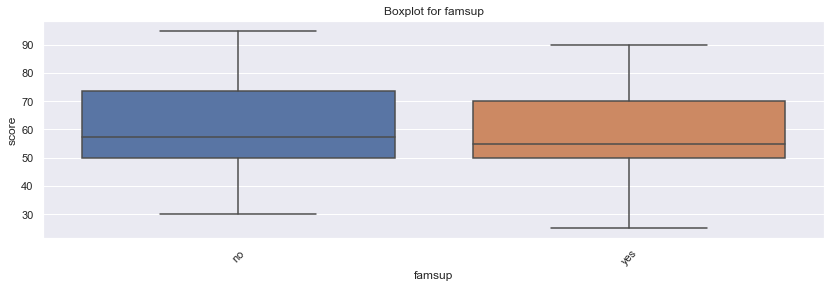

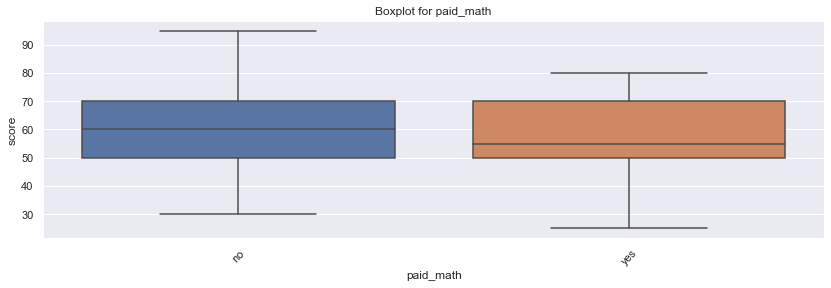

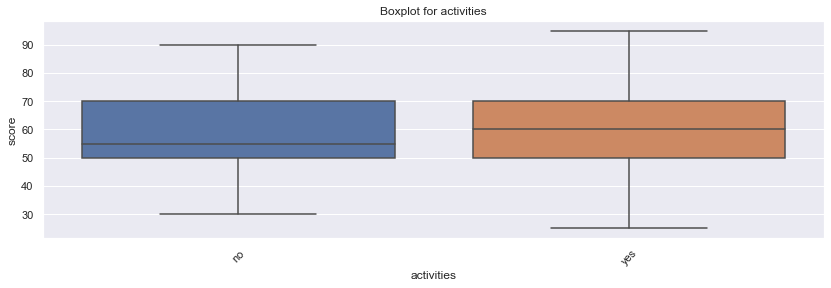

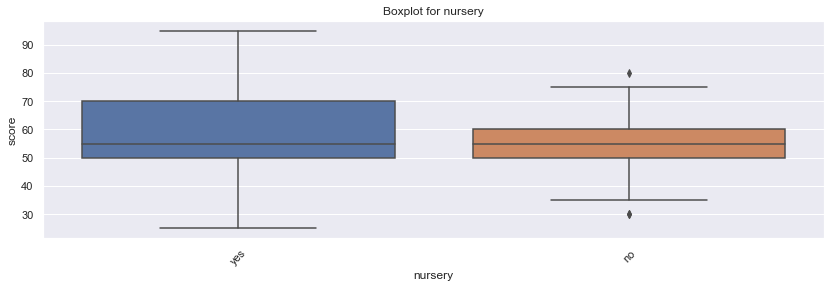

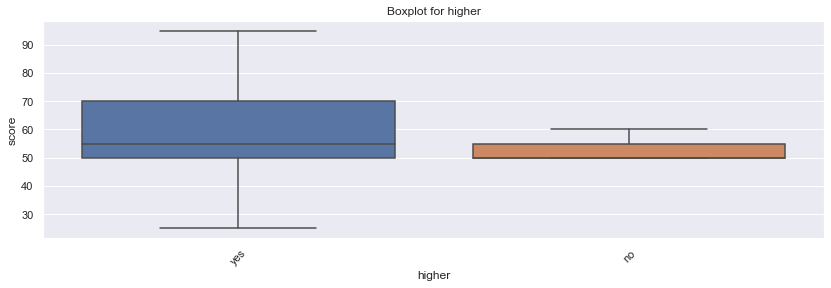

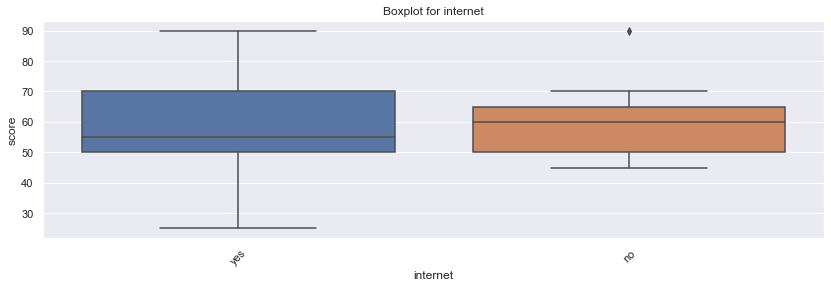

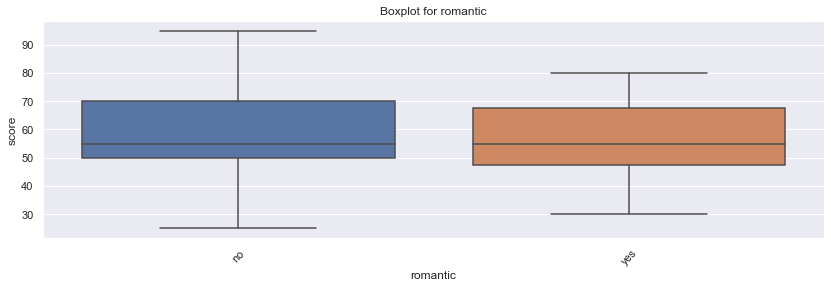

In [157]:
for col in obj_cols:
    get_boxplot(col)

#### Выводы: предварительно из графиков заметна прямая зависимость балла и профессии отца-учитель, а также матери-доктора. И заметно, что желание поступить в вуз также показывает прямую зависимость с ростом балла на экзамене

##### Для уровня доверия 0,05

In [137]:
def get_stat_dif_005(column):
    cols = df[column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ws.ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                        df.loc[df.loc[:, column] == comb[1], 'score'], alternative='two-sided',  usevar='unequal')[1] <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [143]:
def get_stat_dif1_005(column):
    cols = df1[column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ws.ttest_ind(df1.loc[df1.loc[:, column] == comb[0], 'score'],
                        df1.loc[df1.loc[:, column] == comb[1], 'score'], alternative='two-sided',  usevar='unequal')[1] <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

##### Для уровня доверия 0,1

In [148]:
def get_stat_dif_01(column):
    cols = df[column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ws.ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                        df.loc[df.loc[:, column] == comb[1], 'score'], alternative='two-sided',  usevar='unequal')[1] <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

In [149]:
def get_stat_dif1_01(column):
    cols = df1[column].value_counts().index[:5]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ws.ttest_ind(df1.loc[df1.loc[:, column] == comb[0], 'score'],
                        df1.loc[df1.loc[:, column] == comb[1], 'score'], alternative='two-sided',  usevar='unequal')[1] <= 0.1/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', column)
            break

##### Сравнение на уровне доверия 0,05 обработанного и исходного датасетов

In [159]:
for col in obj_cols:
    get_stat_dif_005(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки schoolsup


In [158]:
for col in obj_cols:
    get_stat_dif1_005(col)

Найдены статистически значимые различия для колонки m_job


C:\Users\Nikolay\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:5193: RuntimeWarning: invalid value encountered in greater
  return df > 0
C:\Users\Nikolay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Nikolay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Nikolay\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


##### Сравнение на уровне доверия 0,1 обработанного и исходного датасетов

In [150]:
for col in obj_cols:
    get_stat_dif_01(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки addr_type
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки schoolsup


In [151]:
for col in obj_cols:
    get_stat_dif1_01(col)

Найдены статистически значимые различия для колонки m_job


В итоге у нас получилось два пути: взять датасет после обработки и взять датасет исходный. В зависимости от этого получается два набора признаков:

для исходного:

In [171]:
df1_model1 = df1.loc[:, ['m_job', 'm_edu', 'age',
                         'studytime', 'famrel', 'health', 'go_out', 'higher_dig']]

##### выбираю переменные, которые коррелируют  score, но не коррелируют или минимально коррелируют ежду собой (до 0,1)

In [167]:
df_model = df.loc[:, ['sex', 'addr_type', 'm_job', 'schoolsup',
                      'm_edu', 'age', 'studytime', 'famrel', 'health', 'go_out']]

###### Гипотезы
Взросление обратно коррелирует с баллом на экзамене, предположительно потому, что ученик: 
    • пропускает больше занятий 
    • больше гуляет с друзьями 
    • Появляется интерес к романтически отношениям 
    • Имеет меньше свободного времени 
    • Имеет меньшую дополнительную поддержу в школе (потому что прогуливает или уже закончил школу) и дома (стал самостоятельным и родители уже не оказывают такого влияния)
    • Балл на экзамене ниже 
    
Предположительно ученик в старшем возрасте может также уже работать или учиться в другом вузе, поэтому его фокус внимания смещен со дачи экзамена.
Интересно, что время на учебу вне школы с возрастом почти не меняется (уменьшается незначительно), как и количество свободного времени (почти не увеличиваетя).


Уровень образования матери в большей степени коррелирует с высоким баллом, чем уровень образования отца (тут возможно влияние и качества данных - большого кол-ва пропусков), также заметно большее влияние уровня образования матери на дополнительные источники знаний для ребенка: домашние дополнительные занятия, платные курсы, интернет. В силу этого можно предположить, что с ребенком больше занимаются мать.

    
Также в большой степени на уровень балла экзамена влияет желание поступить в ВУЗ. Дети, которые посещали детский сад также в среднем получают более высокие баллы на экзамене, предположительно потому, что они более устойчивы к неудачам (видна обратная корреляция).

###### Самое ильное влияние
Самое сильное влияние оказывают показатели:
    Положительное: m_edu, higher_dig (новый параметр - желание поступить в ВУЗ), возраст (age), время, проведенное за занятияи вне школы (studytime)
    Отрицательное: age (возраст), failures (кол-во неудач). go_out (время на прогулки)
    номинативные признаки: m_edu (образование матери), а также в завиимости от выбранного пути могут быть еще 'sex', 'addr_type', 'schoolsup'
    
###### Качество данных
Качество данных среднее: дотаточно большое кол-во пропусков (ообенно в health, freetime, famrel, failures, traeltime, f_edu).
Если последовательно очищать выбросы по методу межквартильного разаха, то удаляется очень много информации (наглядно видно в очищенном df - осталось 120 значений из 395), поэтоу рекоендуется очищать только выбросыф за пределаи здравого смысла (те, что нарушают исходные услвоия).

###### Выбрал два пути анализа
Анализ очищенного датасета. Дальше берем показатели: df_model = df.loc[:,['sex', 'addr_type', 'm_job', 'schoolsup', 'm_edu', 'age', 'studytime', 'famrel', 'health', 'go_out']]
Анализ неочищенного датасета, обогащенного доп. колонками: df1_model1 = df1.loc[:,['m_job', 'm_edu', 'age', 'studytime', 'famrel', 'health', 'go_out', 'higher_dig']]